In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('lsu.csv')

In [3]:
df.head()


,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,N,Florida State,L (23-24),20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,NaN,Southern,W (65-17),9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,NaN,Mississippi State,W (31-16),24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,NaN,New Mexico,W (38-0),4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,@,Auburn,W (21-17),19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1


In [4]:
# df['Opponent'].value_counts()

In [5]:
df['team'].value_counts()

ole miss      9
lsu           8
tennessee     8
alabama       8
florida       8
aubrun        8
miss_state    8
kentucky      8
Arkansas      8
texas_am      8
Name: team, dtype: int64

In [6]:
res = df['results']

In [7]:
lsu_w = []

for i in res:
    if (i[0] == 'L'):
        lsu_w.append(0)
    else: 
        lsu_w.append(1)

In [8]:
df1 = df.copy()

In [9]:
df1['results'] = lsu_w

In [10]:
df1.head()

,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,N,Florida State,0,20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,NaN,Southern,1,9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,NaN,Mississippi State,1,24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,NaN,New Mexico,1,4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,@,Auburn,1,19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1


In [11]:
# home away or neutral site
# home 0
# away 1
# neutral 2
locations = []

for index, row in df.iterrows():
    if(row['location'] == '@'):
        locations.append(1)
    elif(row['location'] == 'N'):
        locations.append(2)
    else:
        locations.append(0)

In [12]:
df1['location'] = locations

In [13]:
df1

,Date,team,location,Opponent,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,9/4/22,lsu,2,Florida State,0,20,33,60.6,260,2,...,5.4,14,8,3,25,4,45,2,0,2
1,9/10/22,lsu,0,Southern,1,9,17,52.9,61,0,...,7.9,13,10,0,23,6,40,0,2,2
2,9/17/22,lsu,0,Mississippi State,1,24,42,57.1,214,1,...,5.6,11,8,1,20,7,39,1,0,1
3,9/24/22,lsu,0,New Mexico,1,4,6,66.7,51,0,...,7.9,16,11,1,28,5,60,1,0,1
4,10/1/22,lsu,1,Auburn,1,19,39,48.7,337,2,...,3.6,2,14,3,19,10,94,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,9/24/22,texas_am,2,Arkansas,1,11,21,52.4,151,1,...,5.7,7,17,0,24,3,30,1,0,1
77,10/1/22,texas_am,1,Mississippi State,0,25,39,64.1,252,1,...,6.9,15,6,1,22,13,138,1,0,1
78,10/8/22,texas_am,1,Alabama,0,25,47,53.2,253,2,...,5.7,7,13,4,24,6,73,3,1,4
79,10/22/22,texas_am,1,South Carolina,0,25,47,53.2,269,1,...,4.8,7,6,0,13,6,62,2,0,2


<AxesSubplot:>

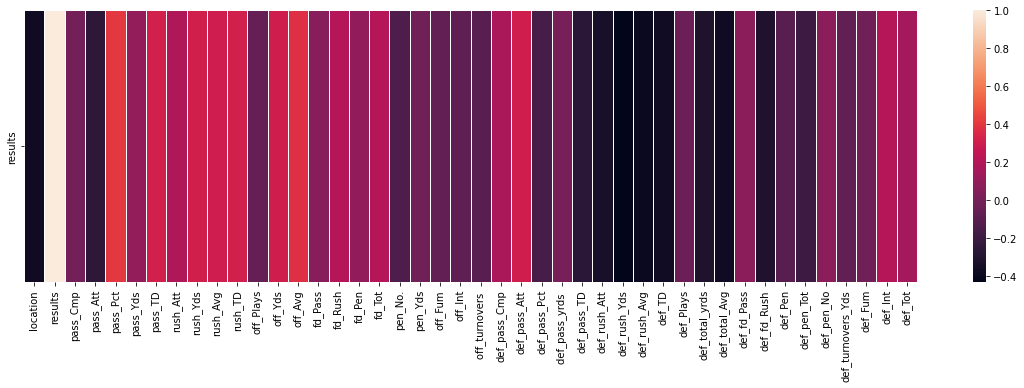

In [14]:
fig, ax = plt.subplots(figsize=(20,5))         
sns.heatmap(df1.corr().loc[['results'],:], linewidth=.9, ax=ax)


In [15]:
df1.corr().loc[['results']]

,location,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
results,-0.372017,1.0,-0.010401,-0.253506,0.407318,0.09828,0.315821,0.192763,0.312037,0.299434,...,-0.369268,0.067372,-0.307848,-0.104431,-0.200394,0.072754,-0.072146,-0.01212,0.20982,0.14834


In [16]:
big_corrs = df1.corr().loc[['results'],:]

In [17]:
# for index, row in big_corrs.iterrows():
#     print((row > .1) | (row < -.3))
       

In [18]:
df1.cov()

,location,results,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
location,0.348457,-0.104167,-0.005556,0.777469,-1.470340,-2.846914,-0.169290,-0.178704,-5.175926,-0.145417,...,0.172870,0.130864,0.554938,0.139198,8.250000e-01,-4.047840e-01,-1.973611,0.031327,-0.068364,-0.037037
results,-0.104167,0.225000,-0.037500,-1.270833,1.988333,4.870833,0.229167,1.000000,13.100000,0.242500,...,-0.250000,0.133333,-0.629167,-0.091667,-5.875000e-01,9.583333e-02,-0.875000,-0.004167,0.079167,0.075000
pass_Cmp,-0.005556,-0.037500,57.775000,71.138889,37.821528,582.398611,6.243056,-34.295833,-263.720833,-2.585000,...,-0.986667,-1.976389,-9.084722,3.661111,-7.400000e+00,2.652778e+00,13.212500,0.802778,0.501389,1.304167
pass_Att,0.777469,-1.270833,71.138889,111.691049,5.209043,692.807562,5.505864,-56.161574,-463.681019,-5.478333,...,-0.326343,-5.836883,-5.267901,4.742284,-6.362500e+00,1.450154e+00,19.290278,1.497377,-0.213117,1.284259
pass_Pct,-1.470340,1.988333,37.821528,5.209043,105.907725,443.454429,7.249506,4.086435,40.727546,1.336208,...,-2.547769,6.788040,-19.543164,2.315123,-1.044000e+01,5.540448e+00,9.070556,-0.035108,1.250710,1.215602
pass_Yds,-2.846914,4.870833,582.398611,692.807562,443.454429,10916.818827,102.251080,-191.230093,-1669.773148,-12.334167,...,-18.110741,18.088272,-91.472377,41.109105,-3.227500e+01,5.328457e+01,383.822222,17.162346,-6.688272,10.474074
pass_TD,-0.169290,0.229167,6.243056,5.505864,7.249506,102.251080,2.340123,-0.371296,14.275926,0.455417,...,-0.610370,-0.514198,-1.988272,0.177469,-2.325000e+00,8.214506e-01,7.348611,0.172840,0.164198,0.337037
rush_Att,-0.178704,1.000000,-34.295833,-56.161574,4.086435,-191.230093,-0.371296,119.611111,737.002778,4.675000,...,1.901389,6.186574,-4.160648,-1.588426,4.375000e-01,3.506019e+00,10.295833,-0.927315,1.113426,0.186111
rush_Yds,-5.175926,13.100000,-263.720833,-463.681019,40.727546,-1669.773148,14.275926,737.002778,7833.369444,120.390000,...,-3.255278,53.493519,-1.612037,-14.556481,3.732500e+01,1.527963e+01,-13.866667,-4.728704,7.081481,2.352778
rush_Avg,-0.145417,0.242500,-2.585000,-5.478333,1.336208,-12.334167,0.455417,4.675000,120.390000,2.915000,...,-0.362750,0.790833,0.330833,-0.247917,8.737500e-01,-9.541667e-02,-2.128750,0.007083,0.055417,0.062500


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:

# fig, ax = plt.subplots(figsize=(90,90))         
# sns.heatmap(X.cov(), linewidth=.1, ax=ax)


In [21]:
# X_train.columns

In [22]:
df2 = df1.copy()

In [23]:
df2 = df2.drop(columns=['Date', 'team', 'Opponent'])

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           81 non-null     int64  
 1   results            81 non-null     int64  
 2   pass_Cmp           81 non-null     int64  
 3   pass_Att           81 non-null     int64  
 4   pass_Pct           81 non-null     float64
 5   pass_Yds           81 non-null     int64  
 6   pass_TD            81 non-null     int64  
 7   rush_Att           81 non-null     int64  
 8   rush_Yds           81 non-null     int64  
 9   rush_Avg           81 non-null     float64
 10  rush_TD            81 non-null     int64  
 11  off_Plays          81 non-null     int64  
 12  off_Yds            81 non-null     int64  
 13  off_Avg            81 non-null     float64
 14  fd_Pass            81 non-null     int64  
 15  fd_Rush            81 non-null     int64  
 16  fd_Pen             81 non-nu

In [25]:
y = df2['results']
X = df2.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.10, random_state=2)

In [26]:
# X_train = X_train.drop(columns=['def_total_yrds', 'off_Yds'])
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_hat_train = lr2.predict(X_train)
r2_score(y_train, y_hat_train)

0.659623174518511

In [27]:
column_list = df2.columns

In [28]:
X_train.columns

Index(['location', 'pass_Cmp', 'pass_Att', 'pass_Pct', 'pass_Yds', 'pass_TD',
       'rush_Att', 'rush_Yds', 'rush_Avg', 'rush_TD', 'off_Plays', 'off_Yds',
       'off_Avg', 'fd_Pass', 'fd_Rush', 'fd_Pen', 'fd_Tot', 'pen_No.',
       'pen_Yds', 'off_Fum', 'off_Int', 'off_turnovers ', 'def_pass_Cmp',
       'def_pass_Att', 'def_pass_Pct', 'def_pass_yrds ', 'def_pass_TD',
       'def_rush_Att', 'def_rush_Yds', 'def_rush_Avg', 'def_TD', 'def_Plays',
       'def_total_yrds', 'def_total_Avg', 'def_fd_Pass', 'def_fd_Rush',
       'def_Pen', 'def_pen_Tot', 'def_pen_No', 'def_turnovers_Yds', 'def_Fum',
       'def_Int', 'def_Tot'],
      dtype='object')

In [29]:
from itertools import combinations
columns_list = X.columns
interactions = list(combinations(column_list, 2))

In [30]:
len(interactions)

946

In [31]:
X

,location,pass_Cmp,pass_Att,pass_Pct,pass_Yds,pass_TD,rush_Att,rush_Yds,rush_Avg,rush_TD,...,def_total_Avg,def_fd_Pass,def_fd_Rush,def_Pen,def_pen_Tot,def_pen_No,def_turnovers_Yds,def_Fum,def_Int,def_Tot
0,2,20,33,60.6,260,2,38,132,3.5,1,...,5.4,14,8,3,25,4,45,2,0,2
1,0,9,17,52.9,61,0,42,201,4.8,1,...,7.9,13,10,0,23,6,40,0,2,2
2,0,24,42,57.1,214,1,22,75,3.4,1,...,5.6,11,8,1,20,7,39,1,0,1
3,0,4,6,66.7,51,0,27,37,1.4,0,...,7.9,16,11,1,28,5,60,1,0,1
4,1,19,39,48.7,337,2,31,101,3.3,0,...,3.6,2,14,3,19,10,94,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2,11,21,52.4,151,1,34,195,5.7,1,...,5.7,7,17,0,24,3,30,1,0,1
77,1,25,39,64.1,252,1,31,136,4.4,2,...,6.9,15,6,1,22,13,138,1,0,1
78,1,25,47,53.2,253,2,25,70,2.8,0,...,5.7,7,13,4,24,6,73,3,1,4
79,1,25,47,53.2,269,1,28,129,4.6,1,...,4.8,7,6,0,13,6,62,2,0,2


In [32]:
new_interactions = []
for i in interactions:
    if (i[0] == 'results'):
        continue
    elif (i[1] == 'results'):
        continue
    else:
        new_interactions.append(i)

In [33]:
len(new_interactions)

903

In [34]:
interaction_dict = {}

for interaction in new_interactions:
    X_train_int = X
    X_train_int['int'] = X_train_int[interaction[0]] * X_train_int[interaction[1]]
    lr3 = LinearRegression()
    lr3.fit(X_train_int, y)
    interaction_dict[lr3.score(X_train_int, y)] = interaction

In [35]:
top_5 = sorted(interaction_dict.keys(), reverse = True)[:5]
for interaction in top_5:
    print(interaction_dict[interaction])

('location', 'def_rush_Avg')
('location', 'pen_No.')
('pass_Cmp', 'def_Pen')
('fd_Pen', 'def_rush_Yds')
('fd_Pen', 'def_rush_Att')


In [36]:
# from df features

In [37]:
X_train_int = X
X_train_int['lo_oen'] = X_train_int['location'] * X_train_int['pen_No.']

In [38]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6454733789138307

In [39]:
X_train_int = X
X_train_int['cmp_def_pen'] = X_train_int['pass_Cmp'] * X_train_int['def_Pen']

In [40]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.6910952439592617

In [41]:
X_train_int = X
X_train_int['pen_def_rush'] = X_train_int['fd_Pen'] * X_train_int['def_rush_Yds']

In [42]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7124998618399422

In [43]:
# from  X_train features 

In [44]:
X_train_int = X
X_train_int['lo_def'] = X_train_int['location'] * X_train_int['def_total_Avg']

In [45]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7210799233580161

In [46]:
X_train_int = X
X_train_int['pass_def'] = X_train_int['pass_Pct'] * X_train_int['def_Pen']

In [47]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7222988881532839

In [48]:
X_train_int = X
X_train_int['def_pass_att'] = X_train_int['pass_Pct'] * X_train_int['def_pass_Att']

In [49]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7234125843978042

In [50]:
X_train_int = X
X_train_int['loc_def_rush'] = X_train_int['location'] * X_train_int['def_rush_Avg']

In [51]:
lr4 = LinearRegression()
lr4.fit(X_train_int, y)
lr4.score(X_train_int, y)

0.7307707977216107

In [52]:
from sklearn.preprocessing import PolynomialFeatures

poly_dict = {}

for feature in X_train_int.columns:
    for p in range(2, 5):
        X_train_poly = X_train_int
        X_train_poly['sq'] = X_train_poly[feature] ** p
        lr = LinearRegression()
        lr.fit(X_train_poly, y)
        poly_dict[lr.score(X_train_poly, y)] = [feature, p]
                  
poly_dict[max(poly_dict.keys())]
                  

['def_Fum', 3]

In [53]:
# poly_dict

In [54]:
# whole df
# 0.7526971321577923: ['def_Fum', 3],

In [55]:
#  0.8325329923245015: ['rush_TD', 4],

X_train = X_train_int
y_train = y_train

need to change the features for the whole df, not just the training sets


In [53]:
new_df = X

In [54]:
new_df['results'] = y

In [55]:
new_df = new_df.drop(columns=['sq', 'int'])

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [57]:
y = new_df['results']
X = new_df.drop(columns=['results'])

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=2)

In [58]:
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5), n_estimators=299, random_state=42
)

In [59]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

In [60]:
y_test

25    0
30    0
29    1
78    0
74    0
57    1
41    1
71    1
23    1
14    1
21    1
36    1
58    1
13    1
67    1
55    0
44    1
1     1
28    1
68    0
52    1
56    0
35    1
48    0
27    0
10    1
45    0
Name: results, dtype: int64

In [61]:
y_pred = regr_2.predict(X_test)

In [62]:
print('r2 score: '+str(r2_score(y_test, y_pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('MSE: '+str(mean_squared_error(y_test, y_pred)))
print('MAE: '+str(mean_absolute_error(y_test, y_pred)))
print('MAPE: '+str(mean_absolute_percentage_error(y_test, y_pred)))

r2 score: -0.2705882352941176
RMSE : 0.5443310539518174
MSE: 0.2962962962962963
MAE: 0.2962962962962963
MAPE: 1000799917193443.5


In [63]:
data = {'y_test': y_test, 'y_pred': y_pred}
new_df = pd.DataFrame(data)
diff = (new_df['y_test'] - (new_df['y_pred'])).abs()
new_df['diff'] = diff
new_df = new_df.sort_values(by='diff', ascending=True)
new_df

,y_test,y_pred,diff
13,1,1.0,0.0
28,1,1.0,0.0
44,1,1.0,0.0
55,0,0.0,0.0
67,1,1.0,0.0
10,1,1.0,0.0
35,1,1.0,0.0
36,1,1.0,0.0
68,0,0.0,0.0
21,1,1.0,0.0


In [76]:
# scale new_df

In [77]:
from sklearn import preprocessing

In [78]:
scaler = preprocessing.StandardScaler().fit(X_train)